In [128]:
import pandas as pd
import numpy as np

# Importar dados do banco de dados

In [129]:
data = pd.read_excel('./../dataset_okuyucu.xlsx')
data

,Total Rotation Speed (rpm),Welding Speed (mm/min),Tensile Strength (MPa),Yield Strength (MPa),Elongation (%),Hardness Weld (HV),Hardness HAZ (HV)
0,500,6.25,112,86,3.04,27.2,27.60
1,500,10.00,104,80,3.34,27.5,28.00
2,500,16.00,103,78,3.71,28.0,28.30
3,500,20.00,102,76,4.78,28.2,28.50
4,800,6.25,102,77,5.22,26.8,26.55
5,800,10.00,101,75,5.44,27.0,26.60
6,800,16.00,92,66,5.52,27.6,27.00
7,800,20.00,91,65,5.63,27.8,27.60
8,1000,6.25,99,75,5.65,26.4,26.00
9,1000,10.00,91,66,6.36,26.8,24.80


# Transformação e seleção dos dados

## Padronização

In [130]:
def normalize_dataset(df):
    return (df - df.min()) / (df.max() - df.min())

norm_df = normalize_dataset(data)
norm_df

,Total Rotation Speed (rpm),Welding Speed (mm/min),Tensile Strength (MPa),Yield Strength (MPa),Elongation (%),Hardness Weld (HV),Hardness HAZ (HV)
0,0.00,0.000000,1.000000,1.000000,0.000000,0.852941,0.823529
1,0.00,0.272727,0.777778,0.846154,0.036496,0.897059,0.901961
2,0.00,0.709091,0.750000,0.794872,0.081509,0.970588,0.960784
3,0.00,1.000000,0.722222,0.743590,0.211679,1.000000,1.000000
4,0.30,0.000000,0.722222,0.769231,0.265207,0.794118,0.617647
5,0.30,0.272727,0.694444,0.717949,0.291971,0.823529,0.627451
6,0.30,0.709091,0.444444,0.487179,0.301703,0.911765,0.705882
7,0.30,1.000000,0.416667,0.461538,0.315085,0.941176,0.823529
8,0.50,0.000000,0.638889,0.717949,0.317518,0.735294,0.509804
9,0.50,0.272727,0.416667,0.487179,0.403893,0.794118,0.274510


## Nova ordem da lista gerada automaticamente

In [131]:
import random
size = len(norm_df)
ordem = [i for i in range(nd)]
ordem

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [132]:
random.shuffle(ordem)
ordem

[9, 1, 15, 13, 17, 0, 19, 2, 4, 8, 14, 12, 3, 6, 7, 18, 11, 10, 16, 5]

## Conjunto de dados de treino

In [133]:
n_treino = 15
d = norm_df.iloc[ordem[0:n_treino]]
d

,Total Rotation Speed (rpm),Welding Speed (mm/min),Tensile Strength (MPa),Yield Strength (MPa),Elongation (%),Hardness Weld (HV),Hardness HAZ (HV)
9,0.50,0.272727,0.416667,0.487179,0.403893,0.794118,0.274510
1,0.00,0.272727,0.777778,0.846154,0.036496,0.897059,0.901961
15,0.75,1.000000,0.222222,0.153846,0.647202,0.691176,0.490196
13,0.75,0.272727,0.305556,0.256410,0.484185,0.500000,0.274510
17,1.00,0.272727,0.083333,1.000000,0.867397,0.088235,0.058824
0,0.00,0.000000,1.000000,1.000000,0.000000,0.852941,0.823529
19,1.00,1.000000,0.000000,0.000000,1.000000,0.352941,0.352941
2,0.00,0.709091,0.750000,0.794872,0.081509,0.970588,0.960784
4,0.30,0.000000,0.722222,0.769231,0.265207,0.794118,0.617647
8,0.50,0.000000,0.638889,0.717949,0.317518,0.735294,0.509804


## Conjunto de dados de validação

In [134]:
dv = norm_df.iloc[ordem[n_treino:size]]
dv

,Total Rotation Speed (rpm),Welding Speed (mm/min),Tensile Strength (MPa),Yield Strength (MPa),Elongation (%),Hardness Weld (HV),Hardness HAZ (HV)
18,1.0,0.709091,0.027778,0.128205,0.894161,0.220588,0.274510
11,0.5,1.000000,0.333333,0.333333,0.558394,0.852941,0.745098
10,0.5,0.709091,0.361111,0.410256,0.474453,0.823529,0.647059
16,1.0,0.000000,0.111111,0.282051,0.536496,0.000000,0.000000
5,0.3,0.272727,0.694444,0.717949,0.291971,0.823529,0.627451


# Arquitetura da rede neural

## Representação visual

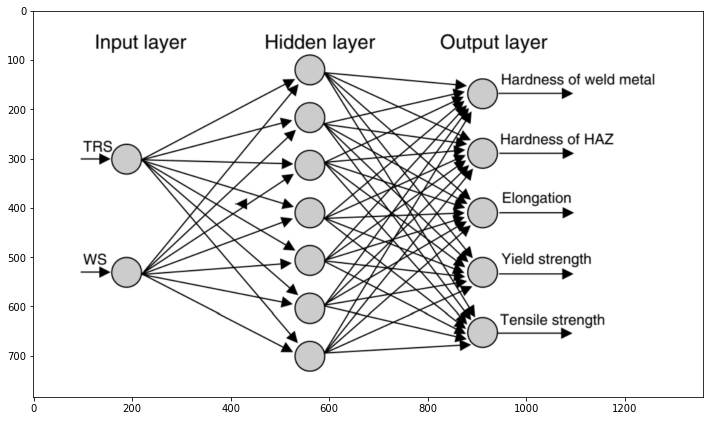

In [135]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('../okuyucu_arquitecture.png')
plt.figure(figsize = (12,12))
plt.imshow(img)

## Número de neurônios de cada camada

In [136]:
ne = 2 # número de neurônios da camada de entrada
nh = 6 # número de neurônios da camada oculta (hidden layer)
ns = 5 # número de neurônios da camada de saída

# Treinamento passo a passo utilizando apenas a primeira linha do dataset
## Propagação
### Vetor de entrada

In [169]:
input_cols = d.columns[0:2]
x = np.array(d[input_cols].iloc[0])
x

array([0.5       , 0.27272727])

### Vetor de entrada com o Bias

In [189]:
bias = 1
xb = np.concatenate((x, [bias]))
xb = xb[np.newaxis]
xb = xb.T

### Geração dos pesos da camada escondida

In [157]:
w1 = [[]]
w1[0] = np.column_stack((np.random.randn(nh, ne), np.ones(nh)))
w1

[array([[-0.54133431,  0.61148249,  1.        ],
        [ 1.09615393,  0.87809243,  1.        ],
        [-2.25813529, -0.27666654,  1.        ],
        [-0.20172175,  0.14393908,  1.        ],
        [ 0.60997393,  0.90655598,  1.        ],
        [ 0.41349114,  1.03370039,  1.        ]])]

### vetor de entrada da camada escondida

In [190]:
v1 = np.dot(w1[0], xb)
v1

array([[ 0.89610079],
       [ 1.78755672],
       [-0.20452215],
       [ 0.93839524],
       [ 1.5522295 ],
       [ 1.48866386]])